In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
mydata=pd.read_csv('CardioGoodFitness.csv')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.precision', 3)


In [3]:
mydata.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [4]:
mydata.isnull().sum()


Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [5]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [6]:
mydata.describe(include='all')


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000,180,180.000,180,180.000,180.000,180.000,180.000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.789,NaN,15.572,NaN,3.456,3.311,53719.578,103.194
std,NaN,6.943,NaN,1.617,NaN,1.085,0.959,16506.684,51.864
min,NaN,18.000,NaN,12.000,NaN,2.000,1.000,29562.000,21.000
25%,NaN,24.000,NaN,14.000,NaN,3.000,3.000,44058.750,66.000
50%,NaN,26.000,NaN,16.000,NaN,3.000,3.000,50596.500,94.000
75%,NaN,33.000,NaN,16.000,NaN,4.000,4.000,58668.000,114.750


In [7]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


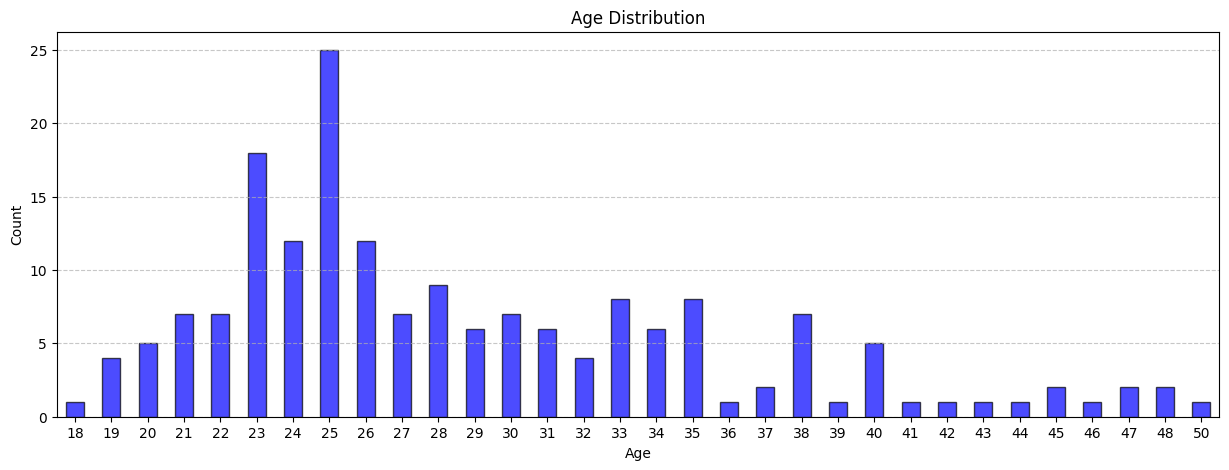

In [8]:
mydata['Age'].value_counts().sort_index(ascending=True).plot(kind='bar', figsize=(15, 5), color='blue', alpha=0.7, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

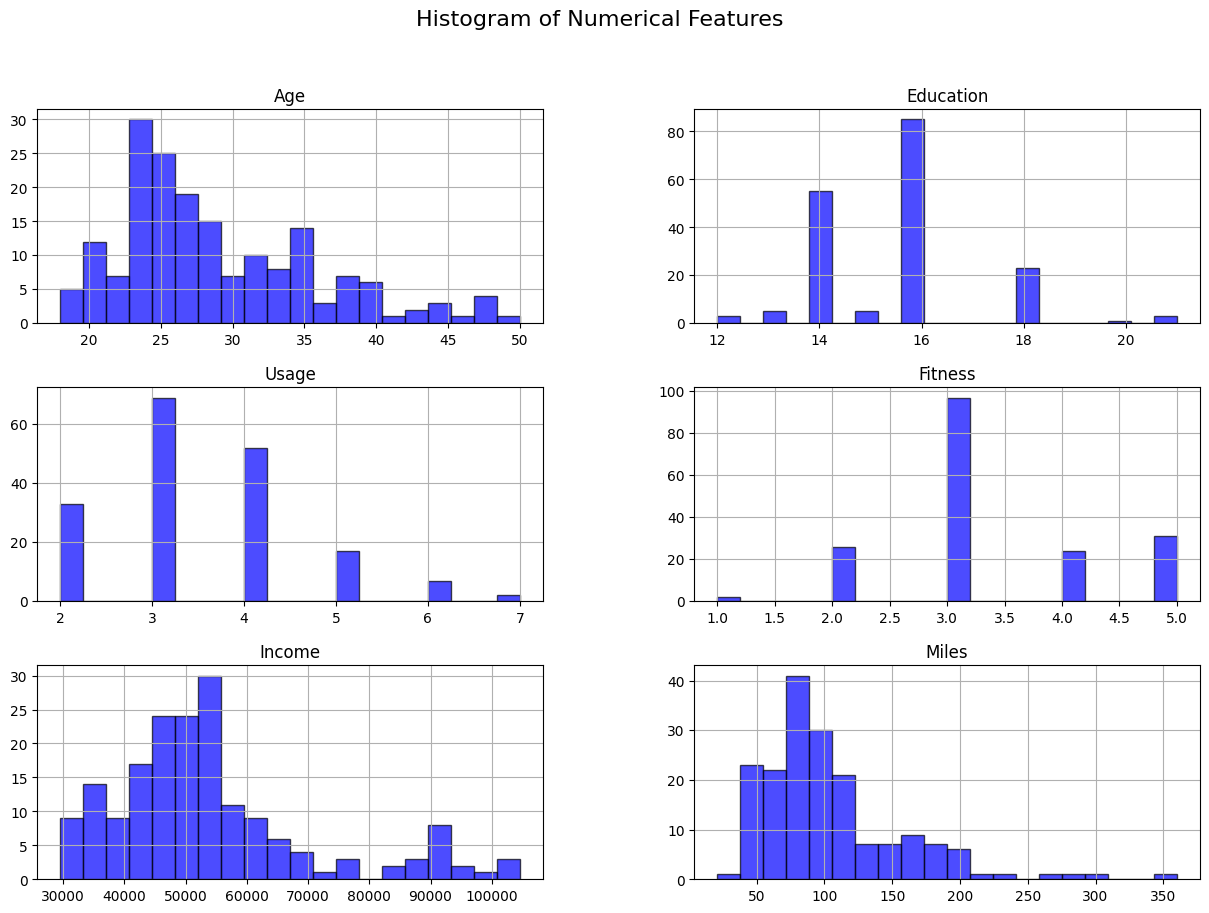

In [9]:
mydata.hist(figsize=(15, 10), bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.suptitle('Histogram of Numerical Features', fontsize=16)
plt.show()


<Axes: xlabel='Age'>

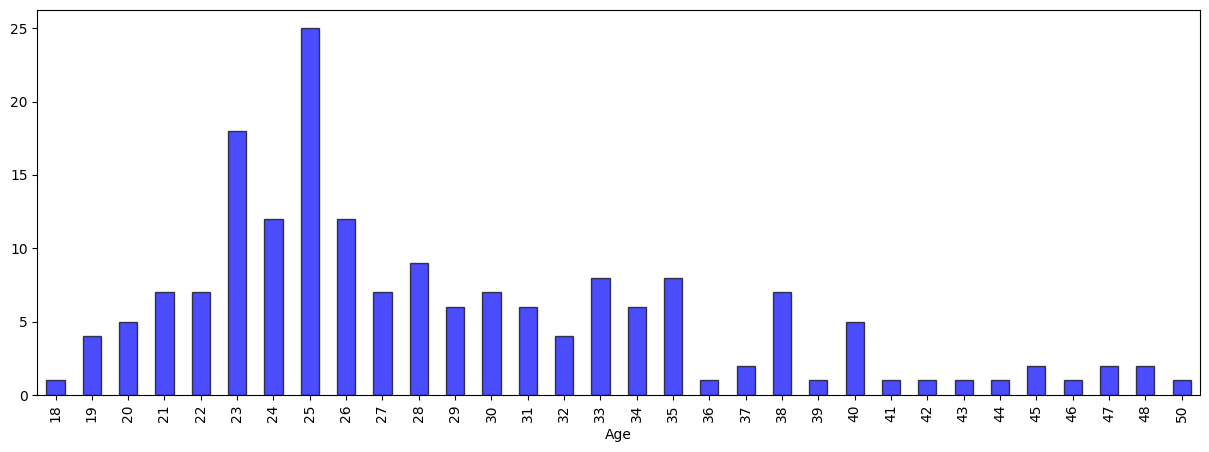

In [10]:
mydata['Age'].value_counts().sort_index(ascending=True).plot(kind='bar', figsize=(15, 5), color='blue', alpha=0.7, edgecolor='black') 

<Axes: xlabel='Age', ylabel='Count'>

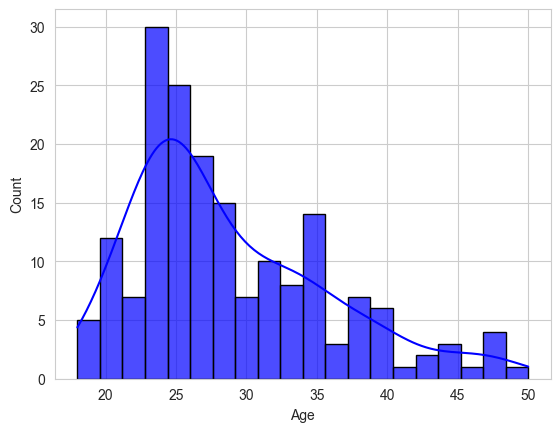

In [11]:
sns.set_style("whitegrid")
sns.set_palette("pastel")
sns.histplot(mydata['Age'], bins=20, kde=True, color='blue', alpha=0.7, edgecolor='black')         


Text(0.5, 1.0, 'Age Distribution with KDE')

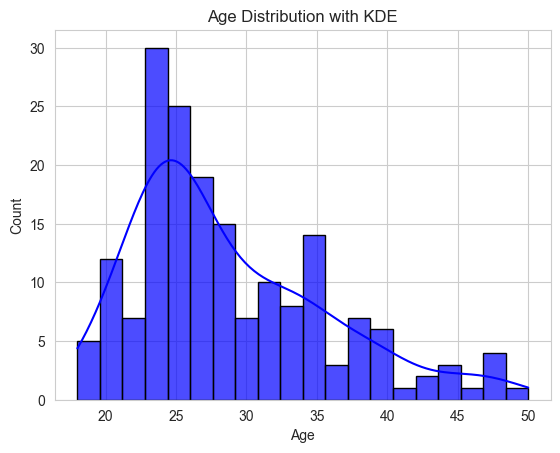

In [12]:
sns.histplot(mydata['Age'], bins=20, kde=True, color='blue', alpha=0.7, edgecolor='black')
plt.title('Age Distribution with KDE')       

Text(0.5, 1.0, 'Boxplot of Age Distribution')

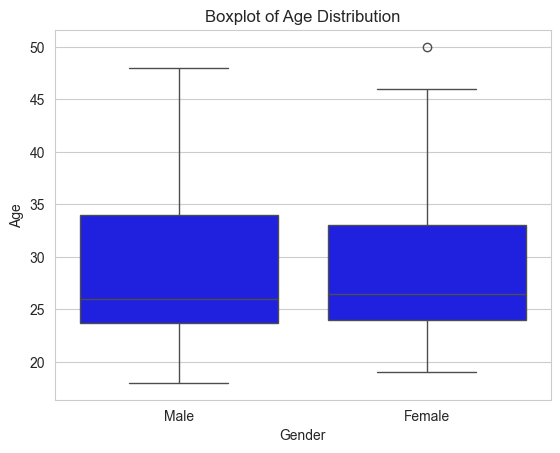

In [13]:
sns.boxplot(x='Gender', y='Age', data=mydata, color='blue')
plt.title('Boxplot of Age Distribution')

In [14]:
pd.crosstab(mydata['Product'],mydata['Gender'])

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


In [15]:
pd.crosstab(mydata['Product'],mydata['MaritalStatus'])


MaritalStatus,Partnered,Single
Product,,
TM195,48,32
TM498,36,24
TM798,23,17


In [16]:
pd.pivot_table(mydata, index='Product', values=['Age','Income'],columns=['MaritalStatus'], aggfunc='mean', fill_value=0)


Age           Income          
MaritalStatus Partnered Single Partnered    Single
Product                                           
TM195            29.667 26.875 47848.750 44271.938
TM498            30.222 26.917 49522.667 48150.125
TM798            29.826 28.118 82047.174 66504.588

<Axes: xlabel='Product'>

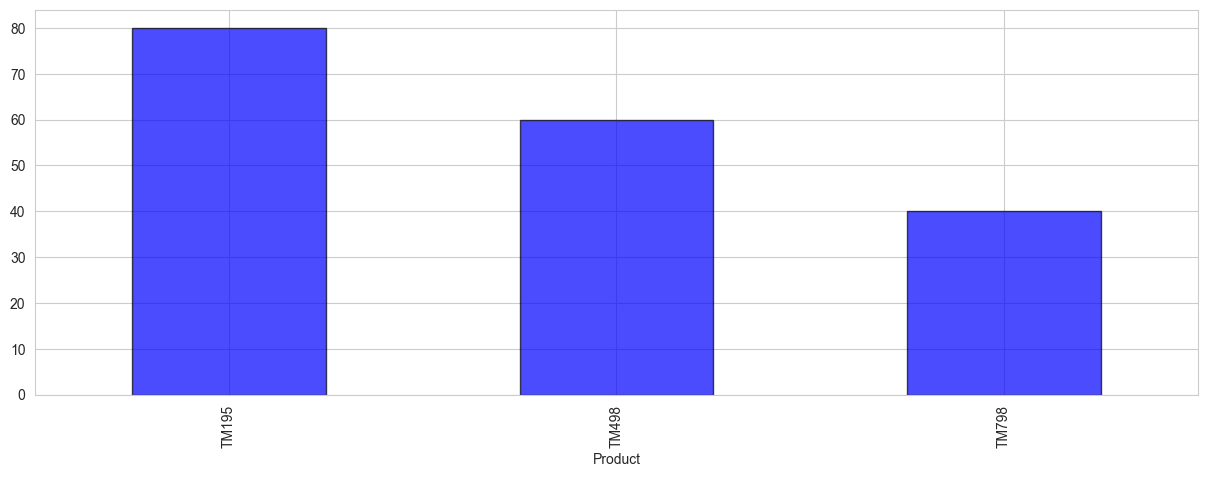

In [17]:
pd.pivot_table(mydata, index='Product', values=['Age','Income'], aggfunc=['mean','median','std'])
mydata['Product'].value_counts().plot(kind='bar', figsize=(15, 5), color='blue', alpha=0.7, edgecolor='black')

In [18]:
pd.crosstab(mydata['Product'],mydata['Education'])


Education,12,13,14,15,16,18,20,21
Product,,,,,,,,
TM195,2,3,30,4,39,2,0,0
TM498,1,2,23,1,31,2,0,0
TM798,0,0,2,0,15,19,1,3


<Axes: xlabel='Product', ylabel='count'>

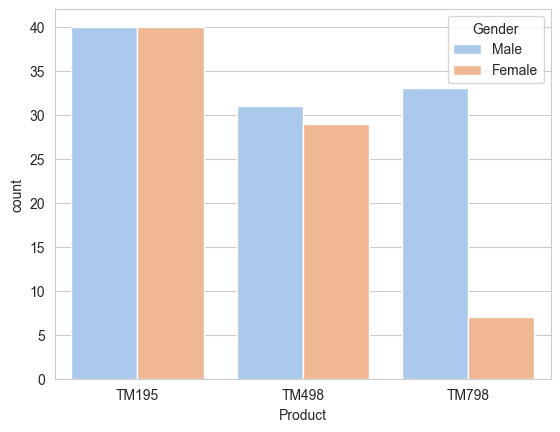

In [19]:
sns.countplot(x='Product',hue='Gender', data=mydata)

In [20]:
pd.crosstab(mydata['Product'],mydata['Income'])

Income,29562,30699,31836,32973,34110,35247,36384,37521,38658,39795,40932,42069,43206,44343,45480,46617,47754,48556,48658,48891,49801,50028,51165,52290,52291,52302,53439,53536,54576,54781,55713,56850,57271,57987,58516,59124,60261,61006,61398,62251,62535,64741,64809,65220,67083,68220,69721,70966,74701,75946,77191,83416,85906,88396,89641,90886,92131,95508,95866,99601,103336,104581
Product,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
TM195,1,1,1,3,2,5,3,2,3,2,4,2,1,4,5,7,0,0,0,2,0,2,3,0,0,6,3,0,7,0,1,2,0,1,0,1,2,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
TM498,0,0,1,2,3,0,1,0,2,0,2,0,4,0,9,1,2,0,0,3,0,5,4,0,0,3,5,0,1,0,0,0,0,3,0,2,1,0,1,0,1,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
TM798,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,2,0,0,1,1,0,0,1,0,1,0,0,1,0,1,0,0,2,0,1,0,2,0,0,0,0,1,1,1,1,1,2,1,2,2,3,3,1,1,1,1,2


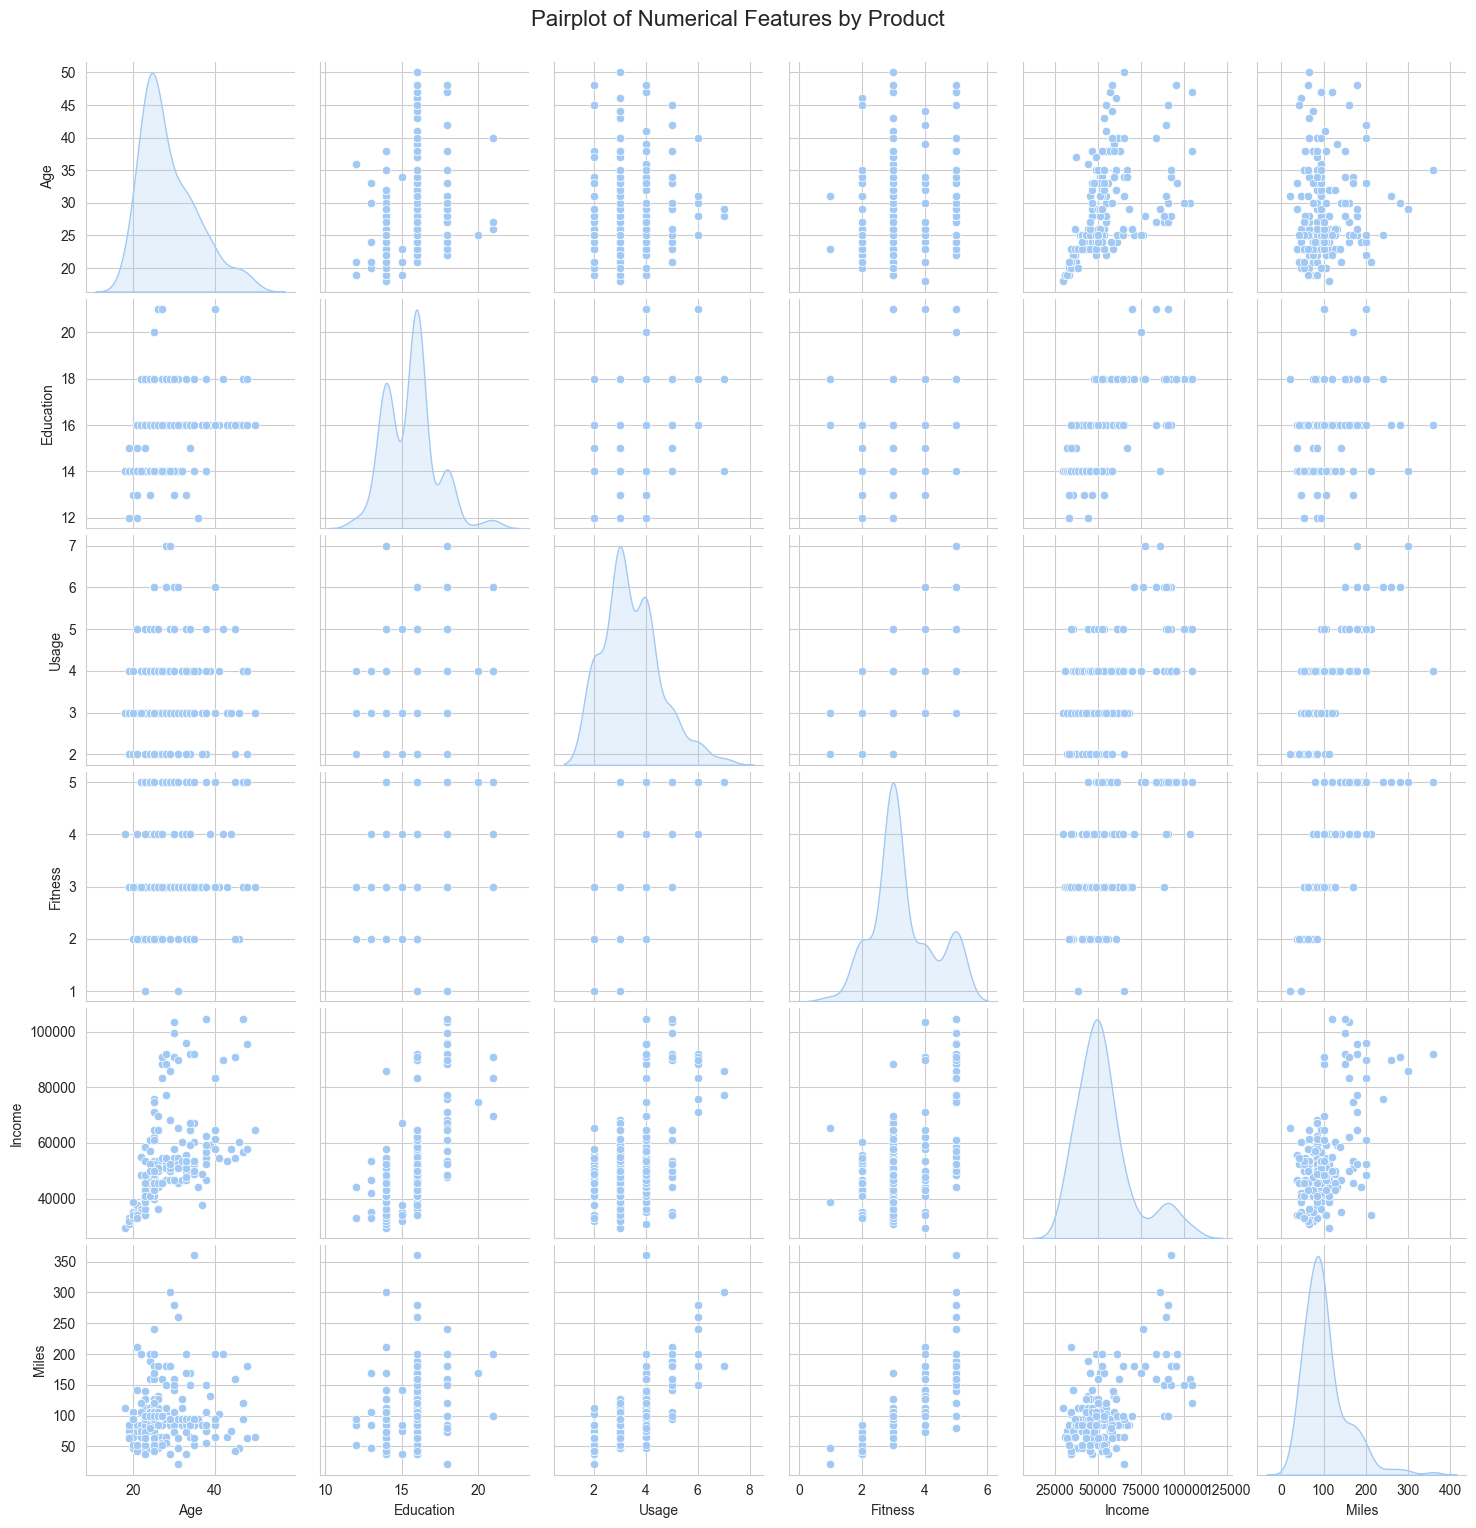

In [21]:
import seaborn as sns
car_df_attr = mydata.iloc[:, 1:16]
# sns.pairplot(car_df_attr,diag_kind='kde')
sns.pairplot(mydata,diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features by Product', y=1.02, fontsize=16)
plt.show()

In [22]:
mydata['Age'].std()

np.float64(6.943498135399795)

In [23]:
mydata['Age'].median()


np.float64(26.0)

In [24]:
mydata['Age'].mean()


np.float64(28.788888888888888)

In [25]:
mydata['Age'].mode()  # Returns the mode of the 'Age' column


0    25
Name: Age, dtype: int64

In [26]:
mydata['Age'].quantile(0.25)  # 25th percentile


np.float64(24.0)

In [27]:
mydata['Age'].quantile(0.75)  # 75th percentile

np.float64(33.0)

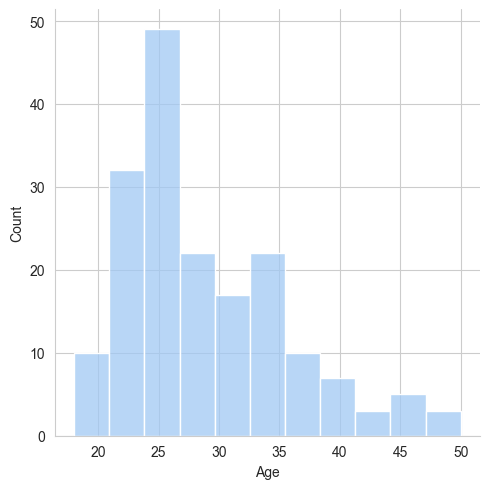

In [28]:
sns.displot(mydata['Age'])

array([<Axes: title={'center': 'Female'}>,
       <Axes: title={'center': 'Male'}>], dtype=object)

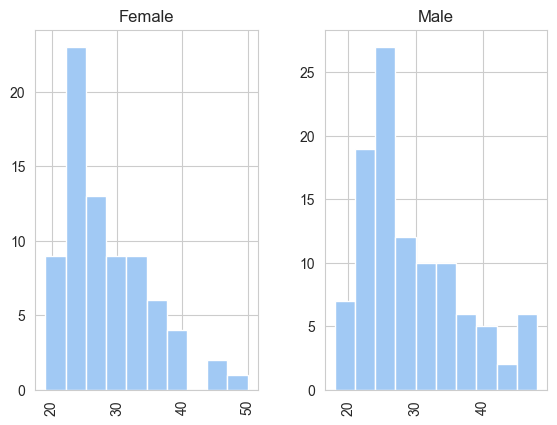

In [29]:
mydata.hist(by='Gender',column='Age')

In [30]:

numerical_df = mydata.select_dtypes(include=np.number)

In [31]:
print("Numerical DataFrame info:")
numerical_df.info()

Numerical DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Age        180 non-null    int64
 1   Education  180 non-null    int64
 2   Usage      180 non-null    int64
 3   Fitness    180 non-null    int64
 4   Income     180 non-null    int64
 5   Miles      180 non-null    int64
dtypes: int64(6)
memory usage: 8.6 KB


In [32]:
corr_matrix = numerical_df.corr()

print("Correlation Matrix (Numerical Only):")
print(corr_matrix)

Correlation Matrix (Numerical Only):
            Age  Education  Usage  Fitness  Income  Miles
Age       1.000      0.280  0.015    0.061   0.513  0.037
Education 0.280      1.000  0.395    0.411   0.626  0.307
Usage     0.015      0.395  1.000    0.669   0.520  0.759
Fitness   0.061      0.411  0.669    1.000   0.535  0.786
Income    0.513      0.626  0.520    0.535   1.000  0.543
Miles     0.037      0.307  0.759    0.786   0.543  1.000


Text(0.5, 1.0, 'Correlation Matrix (Numerical Only)')

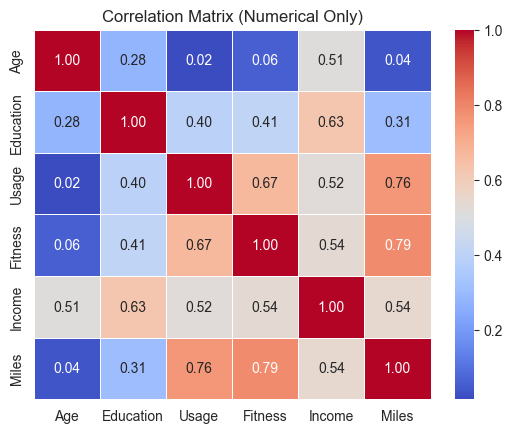

In [33]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix (Numerical Only)')

? CORRELATION Matrix.
A correlation matrix is like a table that shows the correlation coefficient between each pair of variables in your dataset. The correlation coefficient is a number between -1 and +1 that tells us:
Strength of the Relationship: How closely two variables move together.
Closer to +1 or -1: Strong relationship.
Closer to 0: Weak or no relationship.
Direction of the Relationship:
Positive Correlation (closer to +1): As one variable increases, the other tends to increase as well.
Negative Correlation (closer to -1): As one variable increases, the other tends to decrease.
Near Zero Correlation (closer to 0): Variables are not really related to each other in a linear way.
Interpreting Your Matrix:
Let's go through each correlation value in your matrix and translate what it means in plain language:
Diagonal (All 1.00): This is always the case. A variable is perfectly correlated with itself (Age with Age, Education with Education, etc.). This is not interesting for interpretation.
Off-Diagonal Values (the interesting parts):
Age and Education (0.280): Weak Positive Correlation. There's a slight tendency for older individuals to have slightly higher levels of education in this dataset. However, it's not a very strong relationship.
Age and Usage (0.015): Very Weak, Near Zero Correlation. Age and how often someone uses the treadmill are practically unrelated. Older or younger people are equally likely to use it (or not, based on this data).
Age and Fitness (0.061): Very Weak, Near Zero Correlation. Age and fitness level have a negligible relationship in this dataset. Fitness is likely determined by other factors more than just age.
Age and Income (0.513): Moderate Positive Correlation. There's a noticeable tendency for income to increase with age in this dataset. This is a more meaningful relationship. (Keep in mind correlation doesn't mean causation - age doesn't cause income directly, but they often trend together due to career progression, etc.).
Age and Miles (0.037): Very Weak, Near Zero Correlation. Age and the number of miles someone runs on the treadmill are practically unrelated. Age doesn't strongly predict how many miles someone runs.
Education and Usage (0.395): Weak to Moderate Positive Correlation. People with higher education levels tend to use the treadmill slightly more often. This relationship is a bit stronger than the age/education one.
Education and Fitness (0.411): Weak to Moderate Positive Correlation. Individuals with higher education levels tend to have slightly higher fitness levels. This could be due to various factors (awareness of health benefits, access to resources, etc.).
Education and Income (0.626): Moderate to Strong Positive Correlation. There's a significant positive relationship between education and income. Higher education is associated with higher income in this dataset. This is a fairly strong and expected correlation.
Education and Miles (0.307): Weak Positive Correlation. People with higher education tend to run slightly more miles on the treadmill, but the relationship is not very strong.
Usage and Fitness (0.669): Moderate to Strong Positive Correlation. There's a strong positive relationship between how often someone uses the treadmill and their fitness level. This is intuitive - more usage likely contributes to better fitness.
Usage and Income (0.520): Moderate Positive Correlation. People who use the treadmill more frequently tend to have slightly higher incomes. This could be indirectly related (e.g., people with higher incomes might have more time or resources for fitness).
Usage and Miles (0.759): Strong Positive Correlation. This is a very strong and expected correlation. The more someone uses the treadmill (usage frequency), the more miles they are likely to accumulate.
Fitness and Income (0.535): Moderate Positive Correlation. Individuals with higher fitness levels tend to have slightly higher incomes. Again, this could be indirectly related through lifestyle factors, health, etc.
Fitness and Miles (0.786): Strong Positive Correlation. This is another very strong and intuitive correlation. People with higher fitness levels tend to run more miles on the treadmill.
Income and Miles (0.543): Moderate Positive Correlation. People with higher incomes tend to run slightly more miles on the treadmill. This might be related to having more time, better equipment, or simply a lifestyle that includes more fitness activities.

In [34]:
#SIMPLE LINEAR REGRESSION
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [35]:
#Create Linear Regression Model
regr=linear_model.LinearRegression()
y=mydata[['Miles']]
x=mydata[['Usage','Fitness']]
#Train the model using the training sets              
regr.fit(x,y)



LinearRegression()

In [36]:
for idx, col_name in enumerate(x.columns):
    print("The coefficient for {} is {}".format(col_name, regr.coef_[0][idx]))

The coefficient for Usage is 20.214863339075364
The coefficient for Fitness is 27.206499537469593


In [37]:
regr.coef_


array([[20.21486334, 27.20649954]])

In [38]:
intercept = regr.intercept_[0]

print("The intercept for our model is {}".format(intercept))


The intercept for our model is -56.742881784648645


In [39]:
regr.intercept_

array([-56.74288178])

In [40]:
#Make predictions using the testing set
predictions=regr.predict(x)


In [41]:
print(predictions[:5])  # Display first 5 predictions


[[112.72770638]
 [ 65.30634351]
 [105.73607018]
 [ 85.52120684]
 [ 78.52957065]]


In [42]:
print(regr.coef_)  # Display coefficients
print(regr.intercept_)  # Display intercept
print(regr.score(x,y))  # Display R-squared score

[[20.21486334 27.20649954]]
[-56.74288178]
0.7161852926941896
